In [1]:
#==
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split



C:\Users\mxjzh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [188]:
data2 = pd.read_csv('banking.csv')

In [116]:
#data.info()

In [117]:
data.head()
#data.shape

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [79]:
print(list(data.columns)  )  

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [81]:
#==  feature Engineering
# reduce the number of 'education' categories
data['education'].unique()
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [123]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
list(data['education'].unique())

['Basic',
 'unknown',
 'university.degree',
 'high.school',
 'professional.course',
 'illiterate']

# Data exploration

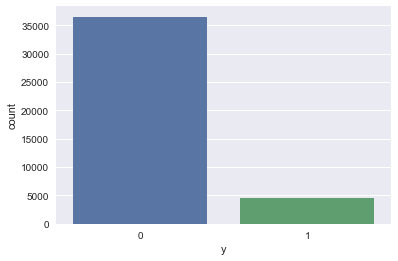

In [124]:
#== Data exploration

# counts for unique values,  with  seaborn  sns.countplot(x='var', data='data')
tgt = data['y'].value_counts()
#sns.countplot(x='education', data=data)
sns.countplot(x='y', data=data)
plt.show()



In [125]:
tgt[1]/len(data['y'])

0.11265417111780131

In [126]:
# for catagorical variable, or variable with small set of values, 
# aggregate the data with a groupby() with mean() may be informative
print(list(data.columns))  
data.groupby('loan').mean()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
loan,,,,,,,,,,,
no,40.058822,258.507246,2.561414,962.411841,0.173078,0.080150,93.575402,-40.481284,3.620732,5166.920563,0.113402
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081
yes,39.846671,258.359315,2.602273,962.437420,0.170455,0.086316,93.567529,-40.652241,3.619294,5167.754369,0.109315


In [127]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [128]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


# Visualization

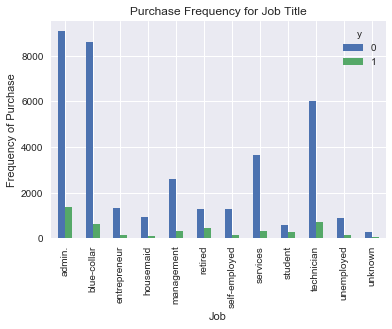

In [129]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [130]:
#===  pd cross tab,  get sucess_rate
df_job_y = pd.crosstab(data['job'], data['y'])
df_job_y['success_rate'] = 100*df_job_y[1]/(df_job_y[0] + df_job_y[1])


In [105]:
df_job_y

y,0,1,success_rate
job,,,
admin.,9070,1352,12.972558
blue-collar,8616,638,6.894316
entrepreneur,1332,124,8.516484
housemaid,954,106,10.000000
management,2596,328,11.217510
retired,1286,434,25.232558
self-employed,1272,149,10.485574
services,3646,323,8.138070
student,600,275,31.428571


In [131]:
#==  one-hot to binary conversion for categorical variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
data_vars=data.columns.values.tolist()
to_keep=[col for col in data_vars if col not in cat_vars]   #keep col in data_var but not in cat_vars

In [133]:
data_final=data[to_keep]   #get subset of cols to_keep
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [134]:
#==  final features for model building
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

In [135]:
#==  using  sklearn.cross_validation   train_test_split function to split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predicting the test set results and calculating the accuracy
 print out the accuracy

In [136]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


# Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [137]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


# Model Evaluation
## Confution Matrix 
evaluate the test_class vs pred_class

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


# Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



#  ROC curve

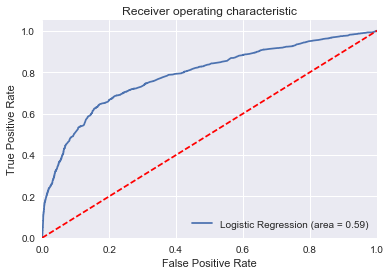

In [140]:
#== ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [141]:
thresholds

array([ 1.88277921,  0.88277921,  0.85629776, ...,  0.01963097,
        0.0195186 ,  0.01944404])

In [189]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [190]:
data_sub = data2.iloc[:,-5:-1]

In [191]:
data_sub.head()

,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,93.444,-36.1,4.963,5228.1
1,93.200,-42.0,4.021,5195.8
2,94.055,-39.8,0.729,4991.6
3,93.075,-47.1,1.405,5099.1
4,92.201,-31.4,0.869,5076.2


In [192]:
y2= data_sub.iloc[:,1]
X2= data_sub.iloc[:,1:]

In [194]:
X2.head()
y2.head()

0   -36.1
1   -42.0
2   -39.8
3   -47.1
4   -31.4
Name: cons_conf_idx, dtype: float64

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y2a = y2.reshape(len(y2),1)
X2_train,X2_test, y2_train, y2_test = train_test_split(X2,y2a, test_size=0.2,random_state=0)

lrm = LinearRegression()
lrm.fit(X2_train,X2_train)
lrm.coef_

C:\Users\mxjzh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


array([[  1.00000000e+00,  -3.05965316e-17,   2.58291071e-17],
       [  1.72033966e-16,   1.00000000e+00,   3.80005507e-17],
       [ -1.07462733e-14,   4.75517247e-14,   1.00000000e+00]])

In [202]:
X2_test.shape

(8238, 3)

In [201]:
y2_test.shape

(8238, 1)

In [203]:
Pred2 = lrm.predict(X2_test)

In [208]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lrm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y2_test, Pred2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y2_test, Pred2))

Coefficients: 
 [[  1.00000000e+00  -3.05965316e-17   2.58291071e-17]
 [  1.72033966e-16   1.00000000e+00   3.80005507e-17]
 [ -1.07462733e-14   4.75517247e-14   1.00000000e+00]]


ValueError: y_true and y_pred have different number of output (1!=3)

In [ ]:
#===  using  statsmodels import regression

import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt


AAPL = asset_ret.values
spy = bench_ret.values

# Add a constant (column of 1s for intercept)
spy_constant = sm.add_constant(spy)

# Fit regression to data
model = regression.linear_model.OLS(AAPL,spy_constant).fit()
alpha , beta = model.params


# Scatter Returns
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Fit Line
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')